In [1]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plot


from google.colab import files


uploaded = files.upload()

Saving Startup Funding  - Sheet1.csv to Startup Funding  - Sheet1 (3).csv


In [2]:
import io

#How does the funding ecosystem change with time?
#Do cities play a major role in funding?
#Which industries are favored by investors for funding?
#Who are the important investors in the Indian Ecosystem?
#How much funds does startups generally get in India?

#Read in the data

startup_df = pd.read_csv(io.BytesIO(uploaded['Startup Funding  - Sheet1.csv']), encoding='ISO-8859-1', low_memory = False)

#copy of dataset
df = startup_df

In [3]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJUâS,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB
None


In [5]:
# Print the shape of the dataset
print(df.shape)

# Print the column names of the dataset
print(df.columns)

# Print the number of missing values in each column of the dataset
print(df.isnull().sum())

(3044, 10)
Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')
Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64


In [6]:
for column in df.columns:
  print(f"{column} unique values:")
  print(df[column].unique())
  print(f"{column} missing values:")
  print(df[column].isnull().sum())

Sr No unique values:
[   1    2    3 ... 3042 3043 3044]
Sr No missing values:
0
Date dd/mm/yyyy unique values:
['09/01/2020' '13/01/2020' '02/01/2020' ... '29/01/2015' '30/01/2015'
 '31/01/2015']
Date dd/mm/yyyy missing values:
0
Startup Name unique values:
['BYJUâ\x80\x99S' 'Shuttl' 'Mamaearth' ... 'Graphene' 'Simplotel'
 'couponmachine.in']
Startup Name missing values:
0
Industry Vertical unique values:
['E-Tech' 'Transportation' 'E-commerce' 'FinTech' 'Fashion and Apparel'
 'Logistics' 'Hospitality' 'Technology' 'E-Commerce' 'Aerospace'
 'B2B-focused foodtech startup' 'Finance' 'Video' 'Gaming' 'Software'
 'Health and wellness' 'Education' 'Food and Beverage'
 'Health and Wellness' 'B2B Marketing' 'Video Games' 'SaaS'
 'Last Mile Transportation' 'Healthcare' 'Customer Service' 'B2B'
 'Consumer Goods' 'Advertising, Marketing' 'IoT' 'Information Technology'
 'Consumer Technology' 'Accounting' 'Retail' 'Customer Service Platform'
 'Automotive' 'EdTech' 'Services' 'Compliance' 'Transpo

In [7]:
df = df.applymap(lambda s: s.strip().lower() if type(s) == str else s)

In [8]:
# Replace 'undisclosed' and 'unknown' with NaN in the Amount in USD column
df['Amount in USD'].replace(['undisclosed', 'unknown'], np.nan, inplace=True)

# Convert Amount in USD column to string
df['Amount in USD'] = df['Amount in USD'].astype(str)

# Remove commas from Amount in USD column
df['Amount in USD'] = df['Amount in USD'].str.replace(',', '')

# Convert Amount in USD column to float
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

# Replace missing values in Amount in USD with the median
median_amount = df['Amount in USD'].median()
df['Amount in USD'].fillna(median_amount, inplace=True)

# Drop the Remarks column since it has too many missing values
df.drop('Remarks', axis=1, inplace=True)

# Drop any rows with missing values
df.dropna(inplace=True)

#drop the 'Sr No' column from the dataframe
df = df.drop(['Sr No'], axis=1)

#drop duplicates
df.drop_duplicates()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,09/01/2020,byjuâs,e-tech,e-learning,bengaluru,tiger global management,private equity round,200000000.0
1,13/01/2020,shuttl,transportation,app based shuttle service,gurgaon,susquehanna growth equity,series c,8048394.0
2,09/01/2020,mamaearth,e-commerce,retailer of baby and toddler products,bengaluru,sequoia capital india,series b,18358860.0
3,02/01/2020,https://www.wealthbucket.in/,fintech,online investment,new delhi,vinod khatumal,pre-series a,3000000.0
4,02/01/2020,fashor,fashion and apparel,embroiled clothes for women,mumbai,sprout venture partners,seed round,1800000.0
...,...,...,...,...,...,...,...,...
2103,29/01/2016,rare media,technology,mobile & cloud based app developer,new delhi,info edge (india) ltd,private equity,1100000.0
2104,29/01/2016,tinmen,consumer internet,food delivery platform,hyderabad,lead angel network,seed funding,1700000.0
2105,29/01/2016,codinglabs,technology,coding skill showcase & resume builder,hyderabad,vineet nalla,seed funding,1700000.0
2106,30/01/2016,findurclass,consumer internet,hobby & activity class aggregator,mumbai,"amit patni, anirudh damani, samir shah",seed funding,1700000.0


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2107
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date dd/mm/yyyy    2080 non-null   object 
 1   Startup Name       2080 non-null   object 
 2   Industry Vertical  2080 non-null   object 
 3   SubVertical        2080 non-null   object 
 4   City  Location     2080 non-null   object 
 5   Investors Name     2080 non-null   object 
 6   InvestmentnType    2080 non-null   object 
 7   Amount in USD      2080 non-null   float64
dtypes: float64(1), object(7)
memory usage: 146.2+ KB
None


In [10]:
from datetime import datetime

# Replace incorrect characters in "Date dd/mm/yyyy" column
df.loc[:, "Date dd/mm/yyyy"] = df.loc[:, "Date dd/mm/yyyy"].str.replace('\\xc2\\xa0', ' ', regex=True)

# Replace any non-breaking spaces with spaces
df.loc[:, "Date dd/mm/yyyy"] = df.loc[:, "Date dd/mm/yyyy"].str.replace('\xa0', ' ')

# Convert the date column to a datetime format
df.loc[:, "Date dd/mm/yyyy"] = pd.to_datetime(df.loc[:, "Date dd/mm/yyyy"], format='%d/%m/%Y', errors='coerce')

# Filter out any NaT (not a time) values
df = df.dropna(subset=["Date dd/mm/yyyy"])

# Format the date column back to a string in your desired format
df.loc[:, "Date dd/mm/yyyy"] = df.loc[:, "Date dd/mm/yyyy"].dt.strftime('%d/%m/%Y')

df['Year'] = df['Date dd/mm/yyyy'].astype(str).str[6:]

# Print the value counts of each unique date in the column
df.loc[:, "Date dd/mm/yyyy"].value_counts()

30/11/2016    11
04/10/2016    10
29/01/2016     9
04/05/2016     9
24/08/2016     9
              ..
22/02/2017     1
16/05/2018     1
14/05/2018     1
11/05/2018     1
03/02/2017     1
Name: Date dd/mm/yyyy, Length: 754, dtype: int64

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2107
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date dd/mm/yyyy    2079 non-null   object 
 1   Startup Name       2079 non-null   object 
 2   Industry Vertical  2079 non-null   object 
 3   SubVertical        2079 non-null   object 
 4   City  Location     2079 non-null   object 
 5   Investors Name     2079 non-null   object 
 6   InvestmentnType    2079 non-null   object 
 7   Amount in USD      2079 non-null   float64
 8   Year               2079 non-null   object 
dtypes: float64(1), object(8)
memory usage: 162.4+ KB
None


In [12]:
#to view/print complete data without ellipsis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
for column in df.columns:
  print(f"{column} unique values:")
  print(df[column].unique())
  print(f"{column} missing values:")
  print(df[column].isnull().sum())

Date dd/mm/yyyy unique values:
['09/01/2020' '13/01/2020' '02/01/2020' '10/01/2020' '12/12/2019'
 '06/12/2019' '03/12/2019' '13/12/2019' '17/12/2019' '16/12/2019'
 '14/12/2019' '11/12/2019' '20/12/2019' '13/11/2019' '14/11/2019'
 '17/11/2019' '18/11/2019' '15/11/2019' '20/11/2019' '12/11/2019'
 '11/11/2019' '19/11/2019' '25/11/2019' '04/10/2019' '02/10/2019'
 '21/10/2019' '05/09/2019' '04/09/2019' '03/09/2019' '01/08/2019'
 '12/08/2019' '13/08/2019' '23/08/2019' '22/08/2019' '21/08/2019'
 '19/08/2019' '27/08/2019' '02/07/2019' '01/07/2019' '03/07/2019'
 '04/07/2019' '10/07/2019' '11/07/2019' '09/07/2019' '08/07/2019'
 '05/06/2019' '04/06/2019' '03/06/2019' '06/06/2019' '10/06/2019'
 '08/06/2019' '06/05/2019' '05/05/2019' '01/05/2019' '02/05/2019'
 '28/05/2019' '30/05/2019' '31/05/2019' '16/04/2019' '12/04/2019'
 '10/04/2019' '13/04/2019' '11/04/2019' '19/04/2019' '17/04/2019'
 '01/02/2019' '08/02/2019' '13/02/2019' '14/02/2018' '03/01/2019'
 '04/01/2019' '04/12/2018' '01/12/2018' '02/1

In [14]:
# Define a dictionary to map the original values to standardized values
mapping = {
    'private equity round': 'private equity',
    'series c': 'series',
    'series b': 'series',
    'pre-series a': 'series',
    'seed round': 'seed',
    'series a': 'series',
    'series d': 'series',
    'seed': 'seed',
    'series f': 'series',
    'series e': 'series',
    'series g': 'series',
    'series h': 'series',
    'venture': 'venture',
    'debt funding': 'debt',
    'seed funding': 'seed',
    'funding round': 'funding round',
    'corporate round': 'corporate round',
    'maiden round': 'maiden round',
    'single venture': 'single venture',
    'venture round': 'venture',
    'angel': 'angel',
    'series j': 'series',
    'angel round': 'angel',
    'venture - series unknown': 'venture',
    'bridge round': 'bridge round',
    'private equity': 'private equity',
    'debt and preference capital': 'debt',
    'inhouse funding': 'inhouse funding',
    'seed/ angel funding': 'seed/angel funding',
    'debt': 'debt',
    'pre series a': 'series',
    'equity': 'private equity',
    'debt-funding': 'debt',
    'mezzanine': 'mezzanine',
    'series b (extension)': 'series',
    'equity based funding': 'private equity',
    'private funding': 'private equity',
    'seed / angel funding': 'seed/angel funding',
    'seed/angel funding': 'seed/angel funding',
    'seed / angle funding': 'seed/angel funding',
    'angel / seed funding': 'seed/angel funding',
    'private': 'private equity',
    'structured debt': 'debt',
    'term loan': 'debt',
    'seed/angel funding': 'seed',
    'privateequity': 'private equity',
    'angel funding': 'angel'
}


# Replace the original values with standardized values using the mapping dictionary
df['InvestmentnType'] = df['InvestmentnType'].replace(mapping)

mapping_2 = {
    'seed/angel funding': 'seed'
}
# Replace the original values with standardized values using the mapping dictionary
df['InvestmentnType'] = df['InvestmentnType'].replace(mapping_2)

# Print the updated unique values in the column to confirm standardization
print(df['InvestmentnType'].unique())


['private equity' 'series' 'seed' 'venture' 'debt' 'funding round'
 'corporate round' 'maiden round' 'single venture' 'angel' 'bridge round'
 'inhouse funding' 'mezzanine']


In [15]:
import re

def clean_location(location):
    location = str(location).lower().strip()
    
    # Replace common misspellings and abbreviations
    location = re.sub(r"\bnw\b", "new", location)
    location = re.sub(r"\bus\b", "united states", location)
    location = re.sub(r"\buk\b", "united kingdom", location)
    location = re.sub(r"\bseattle\b", "washington", location)
    location = re.sub(r"\bsfo\b", "san francisco", location)
    location = re.sub(r"\bang\b", "ahmedabad", location)
    
    # Remove any special characters and extra whitespace
    location = re.sub(r"[^a-z\s]", "", location)
    location = re.sub(r"\s+", " ", location)
    
    # Replace city names with standard names
    if location in ["bengaluru", "kormangala"]:
        return "bangalore"
    elif location in ["gurgaon", "gurugram"]:
        return "gurugram"
    elif location in ["new delhi", "nw delhi", "delhi & cambridge"]:
        return "delhi"
    elif location == "andheri":
        return "mumbai"
    elif location in ["kolkatta", "kolkata"]:
        return "kolkata"
    elif location == "taramani":
        return "chennai"
    elif location in ["palo alto", "menlo park", "san francisco", "san jose"]:
        return "california"
    elif location in ["delhi cambridge", "mumbaibengaluru", "bengaluru and gurugram", "pune/seattle", "seattle / bangalore", "bangalore / sfo", "sfo / bangalore"]:
        return "multiple"
    elif location in ["mumbai united kingdom", "new delhi united states", "bangalore san francisco", "pune dubai", "punewashington", "washington bangalore", "san francisco bangalore", "usa", "united states", "bangalore bangkok", "new york bengaluru", "indiaunited states", "indiasingapore", "india/singapore", "singapore", "mumbai / uk", "new delhi / us", "mumbai/bengaluru"]:
        return "international"
    
    return location

df["City  Location"] = df["City  Location"].apply(clean_location)
# Print the updated unique values in the column to confirm standardization
print(df['City  Location'].unique())


['bangalore' 'gurugram' 'delhi' 'mumbai' 'chennai' 'pune' 'noida'
 'faridabad' 'california' 'amritsar' 'hyderabad' 'burnsville'
 'santa monica' 'international' 'chembur' 'haryana' 'new york' 'karnataka'
 'multiple' 'bhopal' 'jaipur' 'nagpur' 'indore' 'india' 'rourkela'
 'srinagar' 'bhubneswar' 'chandigarh' 'kolkata' 'coimbatore' 'udaipur'
 'ahemdabad' 'bhubaneswar' 'ahmedabad' 'ahemadabad' 'surat' 'goa'
 'uttar pradesh' 'gaya' 'vadodara' 'trivandrum' 'missourie' 'panaji'
 'gwalior' 'karur' 'udupi' 'kochi' 'agra' 'hubli' 'kerala' 'kozhikode'
 'siliguri' 'lucknow' 'kanpur' 'london' 'varanasi' 'jodhpur']


In [16]:
# Print the updated value counts
print(df["InvestmentnType"].value_counts())

# Print the updated value counts
print(df["City  Location"].value_counts())

seed               1021
private equity      928
series               87
debt                 28
venture               4
angel                 3
corporate round       2
funding round         1
maiden round          1
single venture        1
bridge round          1
inhouse funding       1
mezzanine             1
Name: InvestmentnType, dtype: int64
bangalore        639
mumbai           394
delhi            315
gurugram         246
pune              83
hyderabad         75
chennai           74
noida             72
ahmedabad         28
jaipur            24
international     20
kolkata           16
indore            13
vadodara           7
california         6
chandigarh         6
goa                5
multiple           4
kanpur             3
faridabad          3
coimbatore         3
trivandrum         2
surat              2
kochi              2
agra               2
nagpur             2
siliguri           2
bhopal             2
hubli              1
kerala             1
kozhikode          1
u

seed              1021
private equity     928
series              87
debt                28
venture              4
Name: InvestmentnType, dtype: int64


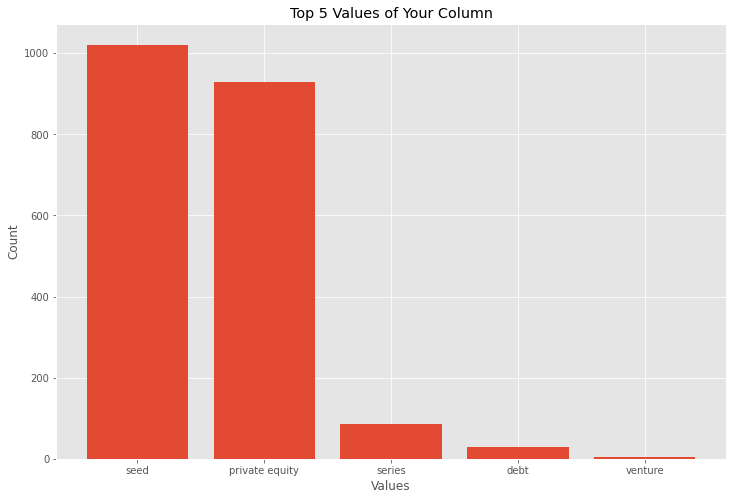

In [17]:
# Get top 5 values
top_5 = df['InvestmentnType'].value_counts().head(5)
print(top_5)
# Create plot
fig, ax = plt.subplots()
ax.bar(top_5.index, top_5.values)
ax.set_title('Top 5 Values of Your Column')
ax.set_xlabel('Values')
ax.set_ylabel('Count')

plt.show()


In [18]:
#Data types for our columns

df.dtypes

Date dd/mm/yyyy       object
Startup Name          object
Industry Vertical     object
SubVertical           object
City  Location        object
Investors Name        object
InvestmentnType       object
Amount in USD        float64
Year                  object
dtype: object

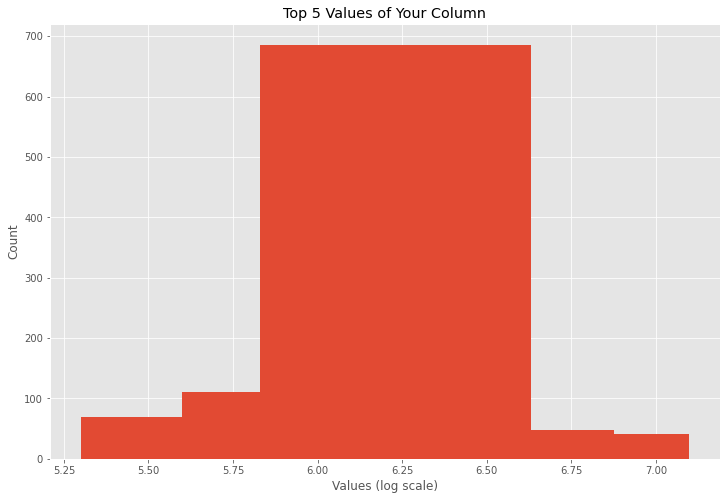

In [19]:
# Convert column to int64 data type
df['Amount in USD'] = df['Amount in USD'].astype('int64')

# Get top 5 values
top_amount = df['Amount in USD'].value_counts().head(5)

# Create plot with log scale for x-axis
fig, ax = plt.subplots()
ax.bar(np.log10(top_amount.index), top_amount.values)
ax.set_title('Top 5 Values of Your Column')
ax.set_xlabel('Values (log scale)')
ax.set_ylabel('Count')

plt.show()


bangalore    639
mumbai       394
delhi        315
gurugram     246
pune          83
Name: City  Location, dtype: int64


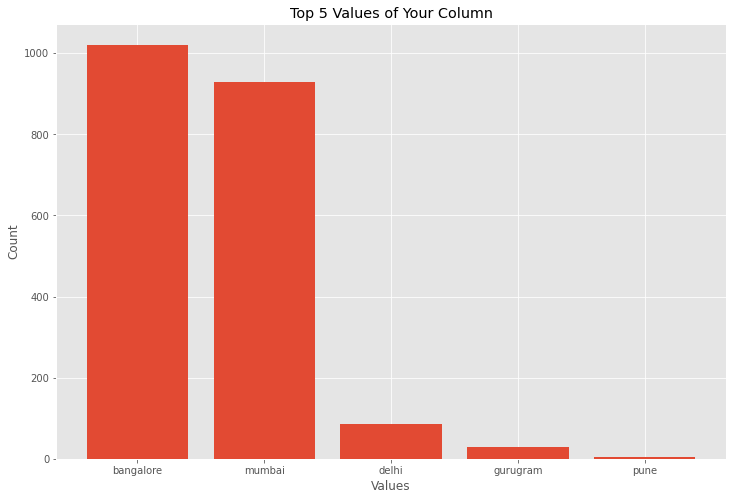

In [20]:
# Get top 5 values
top_5_cities = df['City  Location'].value_counts().head(5)
print(top_5_cities)
# Create plot
fig, ax = plt.subplots()
ax.bar(top_5_cities.index, top_5.values)
ax.set_title('Top 5 Values of Your Column')
ax.set_xlabel('Values')
ax.set_ylabel('Count')

plt.show()


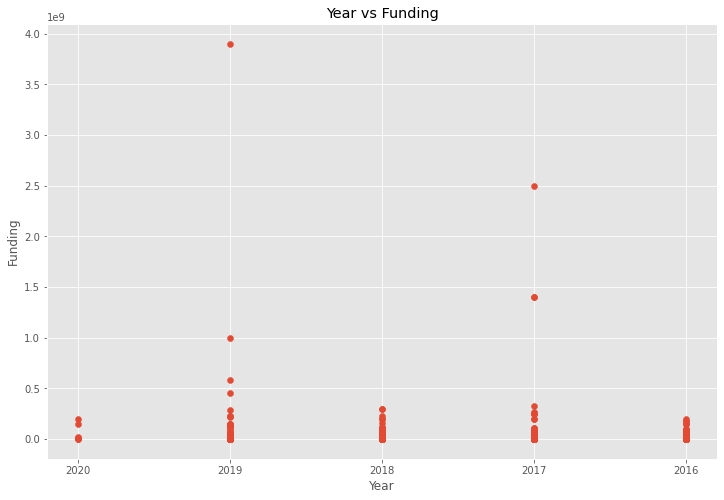

In [21]:
plt.scatter(x=df['Year'], y=df['Amount in USD'])
plt.title('Year vs Funding')
plt.xlabel('Year')
plt.ylabel('Funding')
plt.show()

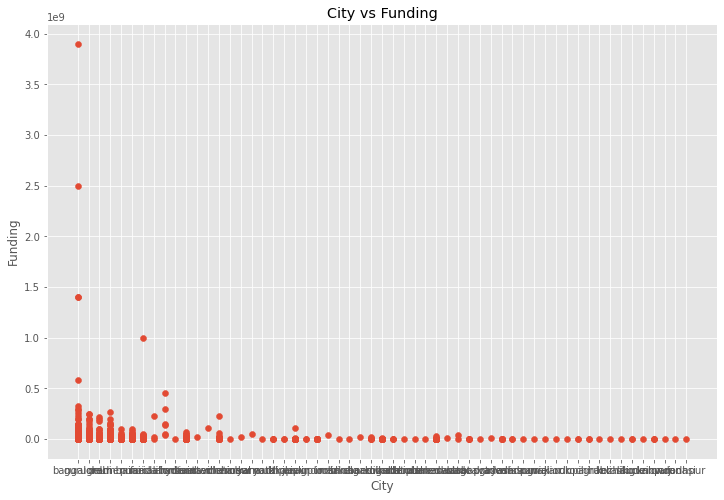

In [22]:
plt.scatter(x=df['City  Location'], y=df['Amount in USD'])
plt.title('City vs Funding')
plt.xlabel('City')
plt.ylabel('Funding')
plt.show()

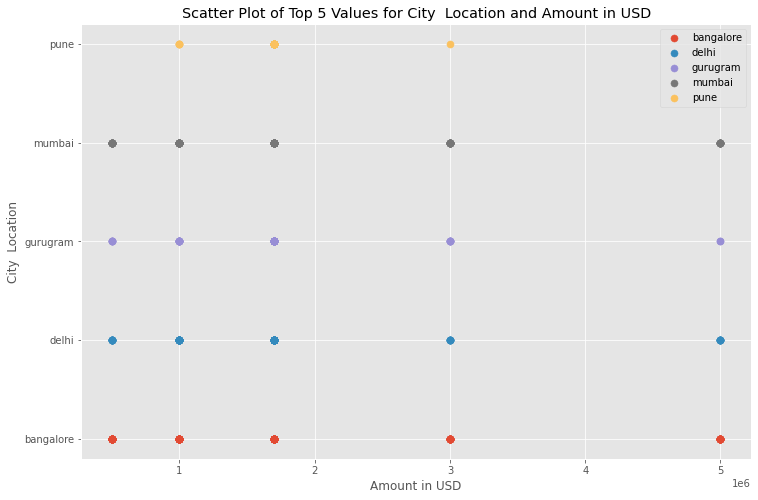

In [23]:
# Get top 5 values for the first column
top_col1 = df['City  Location'].value_counts().head(5).index.tolist()

# Get top 5 values for the second column
top_col2 = df['Amount in USD'].value_counts().head(5).index.tolist()

# Filter the DataFrame to only include rows with the top 5 values for both columns
df_filtered = df[df['City  Location'].isin(top_col1) & df['Amount in USD'].isin(top_col2)]

# Create a scatter plot
fig, ax = plt.subplots()
for key, grp in df_filtered.groupby(['City  Location']):
    ax.scatter(grp['Amount in USD'], grp['City  Location'], label=key, s=50)

ax.legend()
ax.set_xlabel('Amount in USD')
ax.set_ylabel('City  Location')
ax.set_title('Scatter Plot of Top 5 Values for City  Location and Amount in USD')

plt.show()


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


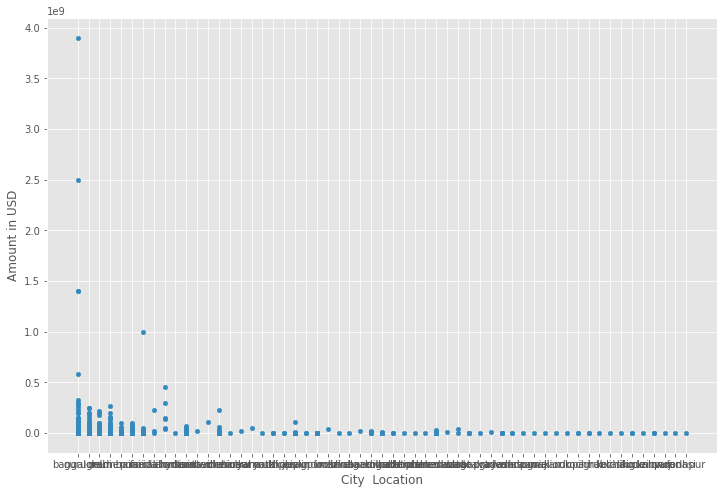

In [24]:
df.plot(kind='scatter', x='City  Location', y='Amount in USD')
plt.show()

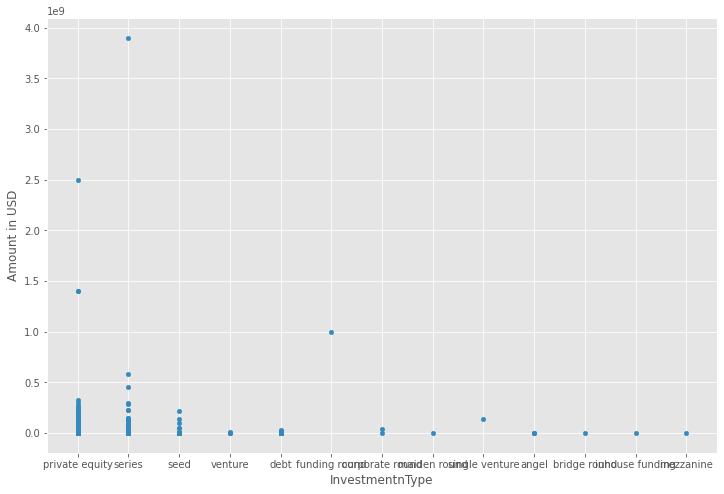

In [25]:
df.plot(kind='scatter', x='InvestmentnType', y='Amount in USD')
plt.show()

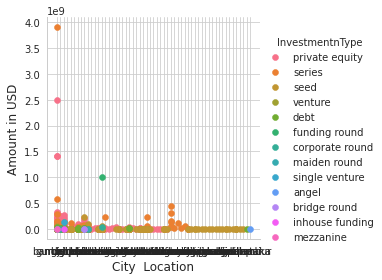

In [26]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="InvestmentnType", height=4) \
   .map(plt.scatter, "City  Location", "Amount in USD") \
   .add_legend();
plt.show();

In [27]:
#Data types for our columns

df.dtypes

Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD         int64
Year                 object
dtype: object

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


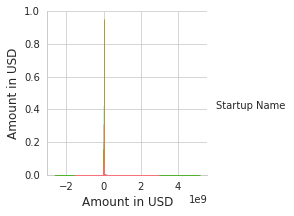

In [28]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="Startup Name",size=3);
plt.show();


In [29]:
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year
0,225,197,28,447,5,1480,8,200000000,4
1,331,1312,85,70,19,1445,10,8048394,4
2,225,897,27,1566,5,1303,10,18358860,4
3,34,664,41,1226,15,1611,10,3000000,4
4,34,455,36,499,40,1395,9,1800000,4
5,331,1085,62,1414,13,334,10,9000000,4
6,249,1697,54,1166,19,149,8,150000000,4
7,328,387,83,27,45,1280,10,6000000,3
8,173,207,27,110,19,1077,10,70000000,3
9,83,337,2,1600,5,968,9,50000000,3


In [30]:
df_numerized.describe() #describing the whole class

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year
count,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2079.000000,2.079000e+03,2079.000000
mean,379.421356,858.119769,40.837422,934.213564,20.318422,875.947571,8.491101,1.432551e+07,0.779221
std,212.452962,489.401453,26.120004,526.868455,14.668083,494.231616,0.977018,1.167832e+08,0.895842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.800000e+04,0.000000
25%,198.000000,434.500000,20.000000,475.500000,5.000000,450.500000,8.000000,1.000000e+06,0.000000
50%,382.000000,869.000000,30.000000,958.000000,15.000000,882.000000,9.000000,1.700000e+06,1.000000
75%,561.000000,1279.500000,70.000000,1365.500000,40.000000,1323.500000,9.000000,4.000000e+06,1.000000
max,753.000000,1702.000000,89.000000,1858.000000,56.000000,1681.000000,12.000000,3.900000e+09,4.000000


In [31]:
# Display summary statistics
print(df_numerized.describe())

# Check for missing values
print(df_numerized.isnull().sum())

       Date dd/mm/yyyy  Startup Name  Industry Vertical  SubVertical  \
count      2079.000000   2079.000000        2079.000000  2079.000000   
mean        379.421356    858.119769          40.837422   934.213564   
std         212.452962    489.401453          26.120004   526.868455   
min           0.000000      0.000000           0.000000     0.000000   
25%         198.000000    434.500000          20.000000   475.500000   
50%         382.000000    869.000000          30.000000   958.000000   
75%         561.000000   1279.500000          70.000000  1365.500000   
max         753.000000   1702.000000          89.000000  1858.000000   

       City  Location  Investors Name  InvestmentnType  Amount in USD  \
count     2079.000000     2079.000000      2079.000000   2.079000e+03   
mean        20.318422      875.947571         8.491101   1.432551e+07   
std         14.668083      494.231616         0.977018   1.167832e+08   
min          0.000000        0.000000         0.000000   1.

<Axes: >

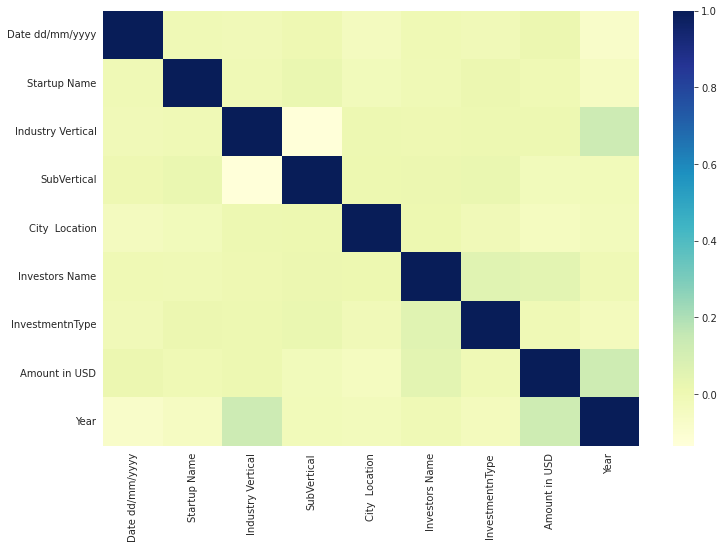

In [32]:
# Check correlation between variables
correlations = df_numerized.corr()
sns.heatmap(correlations, cmap="YlGnBu")

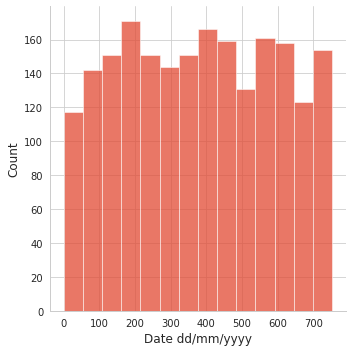

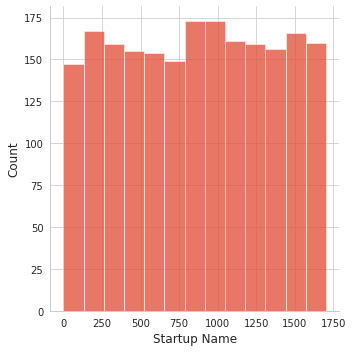

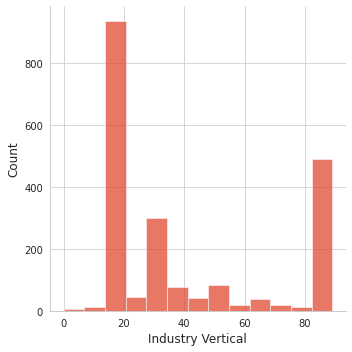

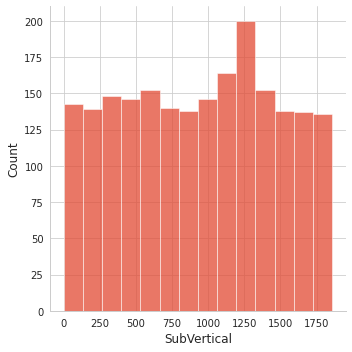

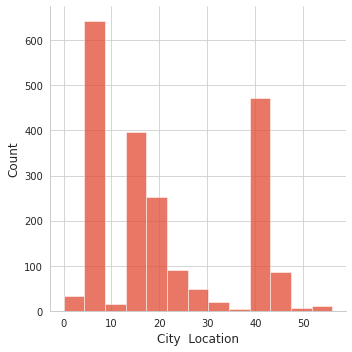

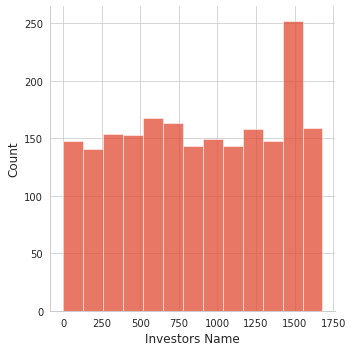

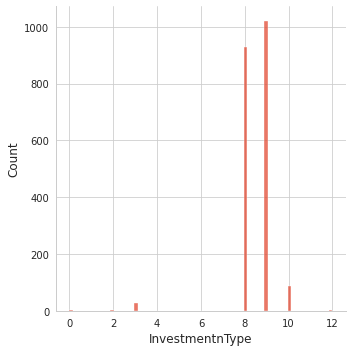

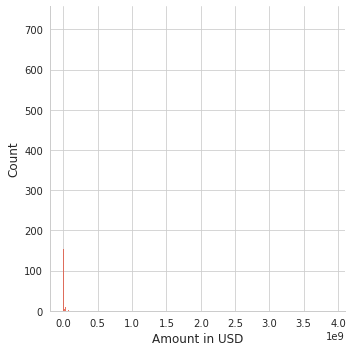

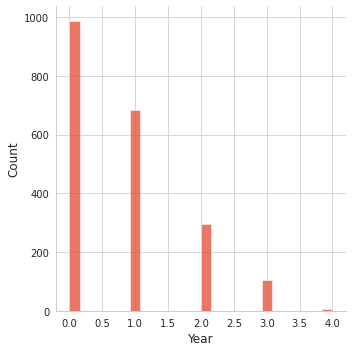

In [33]:
# Visualize distribution of each variable
for col in df_numerized.columns:
    sns.displot(df_numerized[col], kde=False)

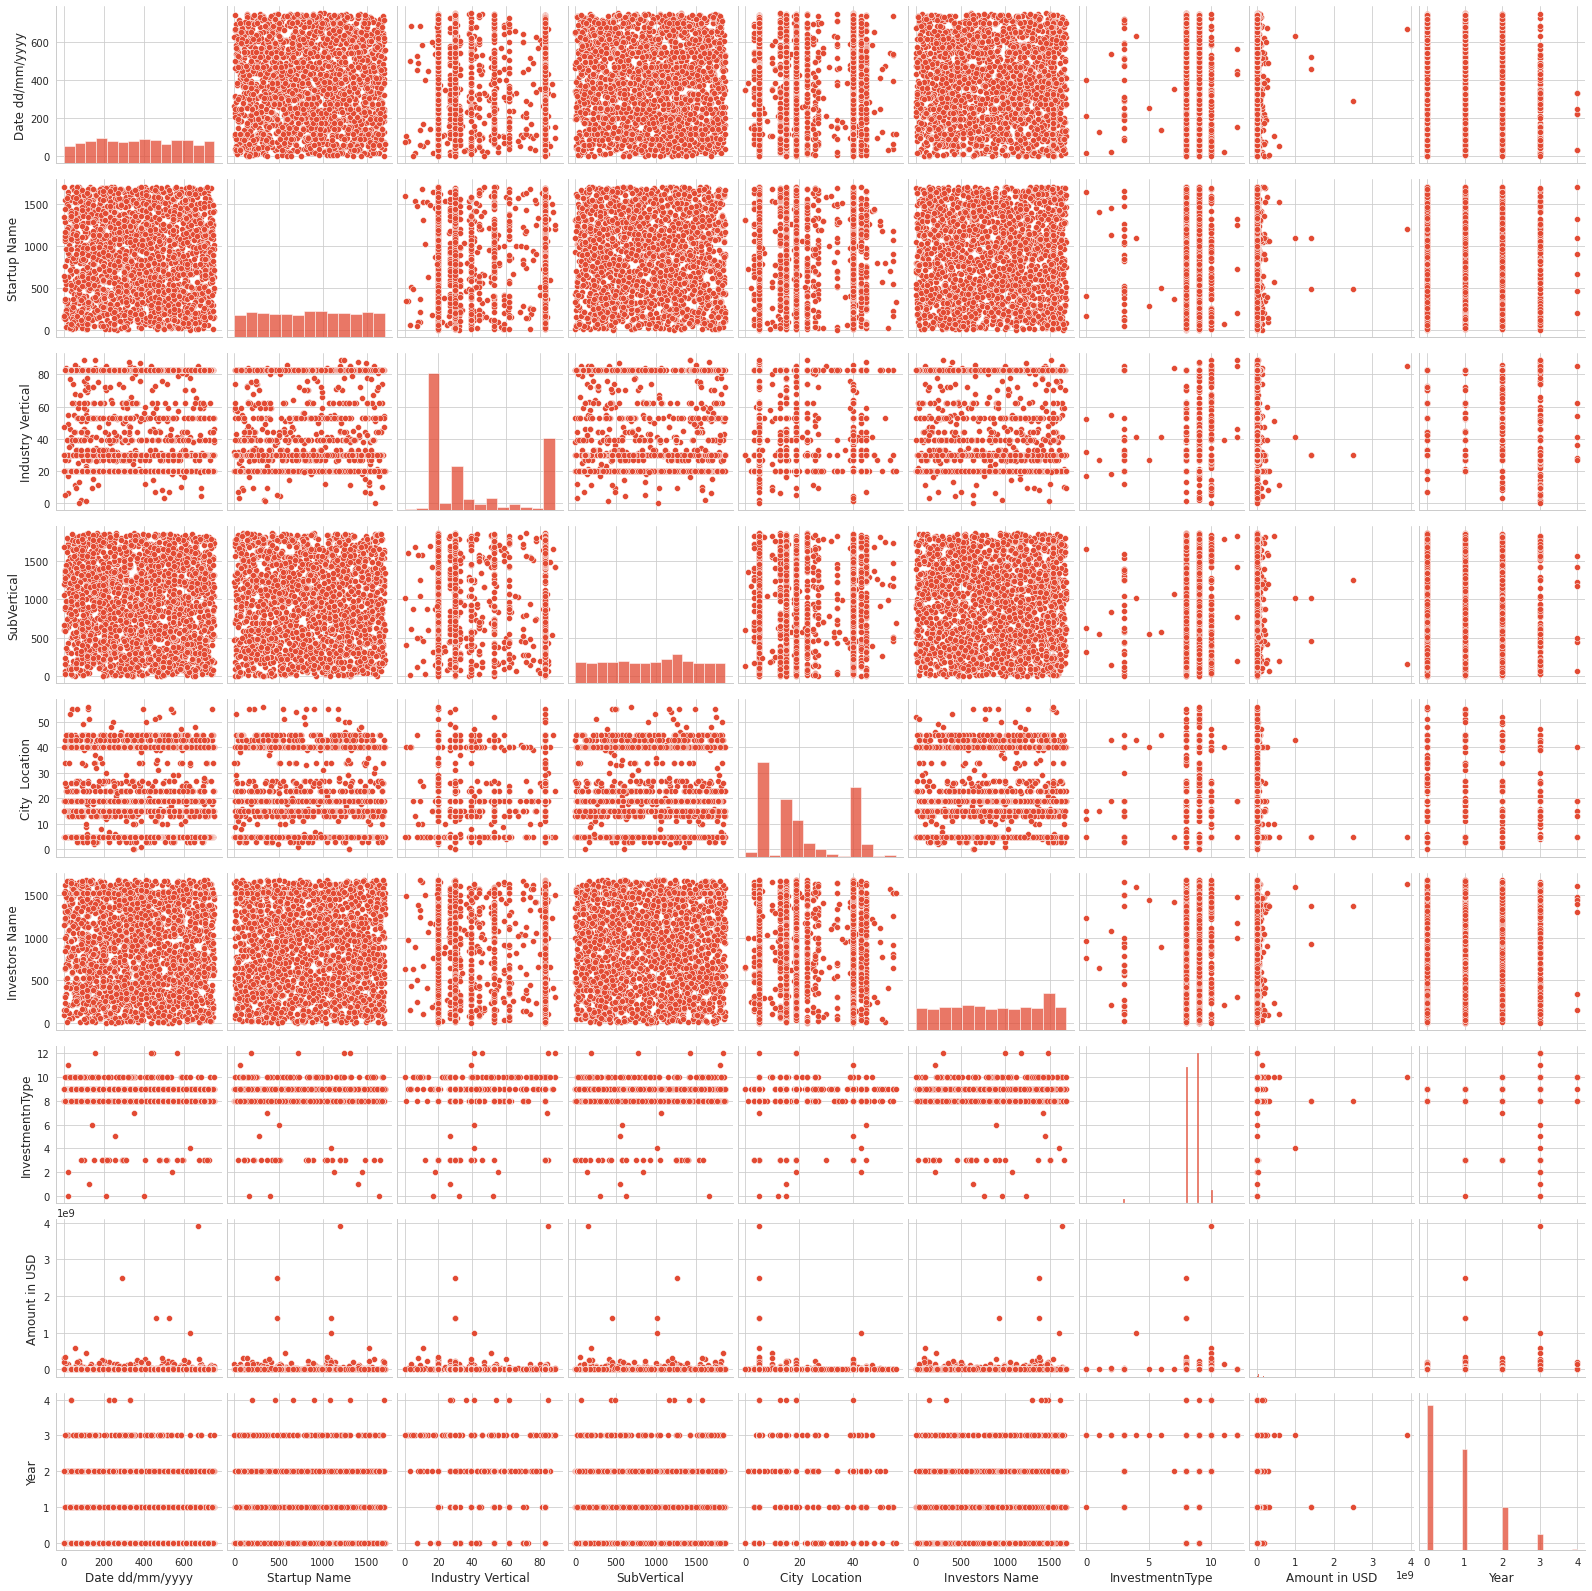

In [34]:
# Visualize relationship between variables
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df_numerized)

t-statistic: nan
p-value: nan


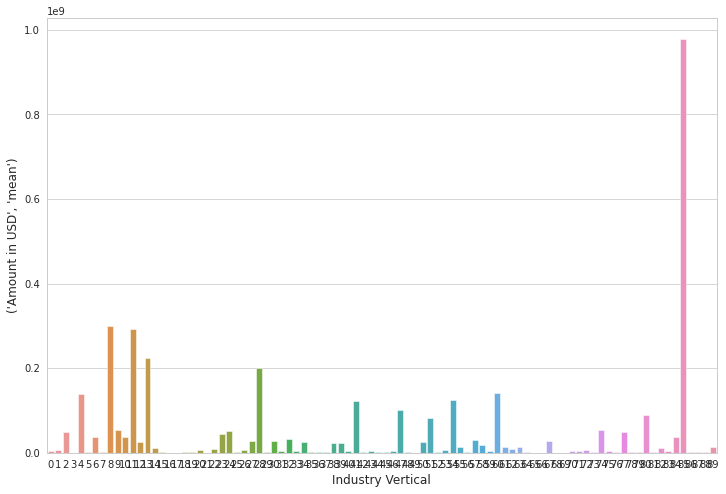

In [35]:
# Group and aggregate data
grouped_data = df.groupby(['Industry Vertical']).agg({'Amount in USD': ['mean', 'median', 'std']})

# Visualize grouped data
sns.barplot(x=grouped_data.index, y=grouped_data[('Amount in USD', 'mean')])

# Perform hypothesis testing
from scipy.stats import ttest_ind
sample1 = df[df['City  Location'] == 'Bangalore']['Amount in USD']
sample2 = df[df['City  Location'] == 'Mumbai']['Amount in USD']
t_statistic, p_value = ttest_ind(sample1, sample2)
print("t-statistic:", t_statistic)
print("p-value:", p_value)


<Axes: xlabel='Amount in USD', ylabel='Count'>

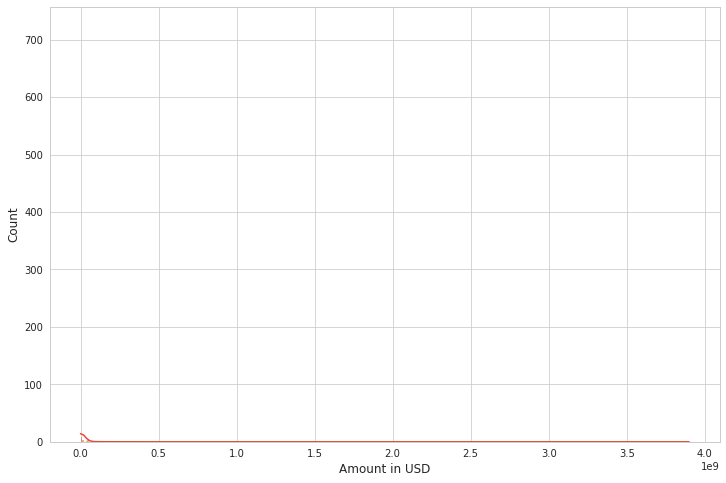

In [36]:
# Check the distribution of the target variable (if any)
sns.histplot(df["Amount in USD"], kde=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

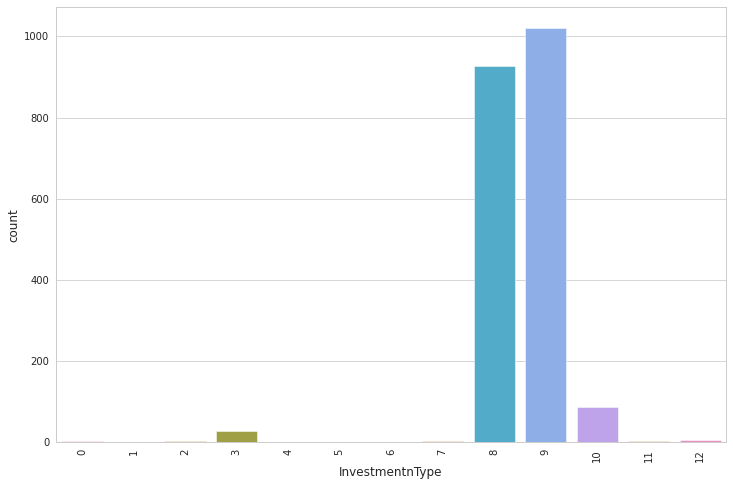

In [37]:
# Check the distribution of categorical variables
sns.countplot(x="Industry Vertical", data=df)
plt.xticks(rotation=90)

sns.countplot(x="InvestmentnType", data=df)
plt.xticks(rotation=90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

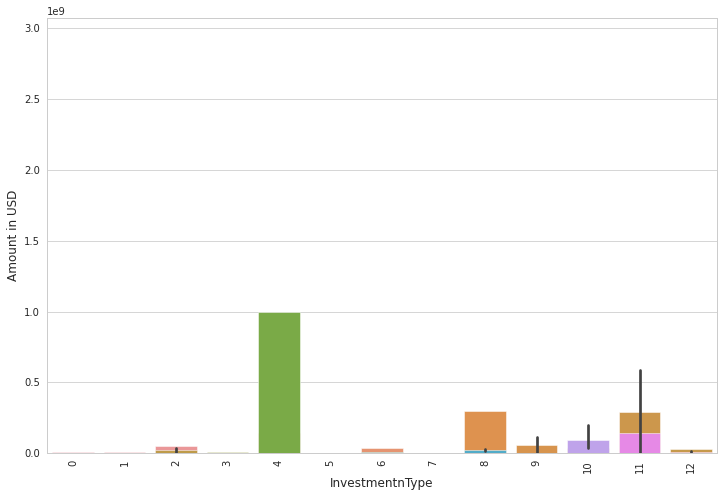

In [38]:
# Check the relationship between categorical and numerical variables
sns.barplot(x="Industry Vertical", y="Amount in USD", data=df)
plt.xticks(rotation=90)

sns.barplot(x="InvestmentnType", y="Amount in USD", data=df)
plt.xticks(rotation=90)

<Axes: xlabel='Investors Name', ylabel='count'>

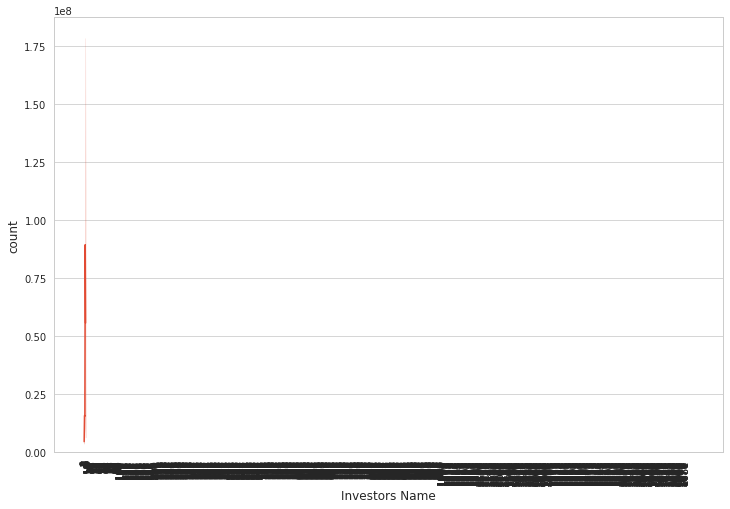

In [39]:

# Check for any other patterns or trends in the data
# For example, if the startup names or investors are repeated frequently, 
# or if there are any trends in the investment amounts over time
sns.countplot(x="Startup Name", data=df)
plt.xticks(rotation=90)

sns.countplot(x="Investors Name", data=df)
plt.xticks(rotation=90)

sns.lineplot(x="Year", y="Amount in USD", data=df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text

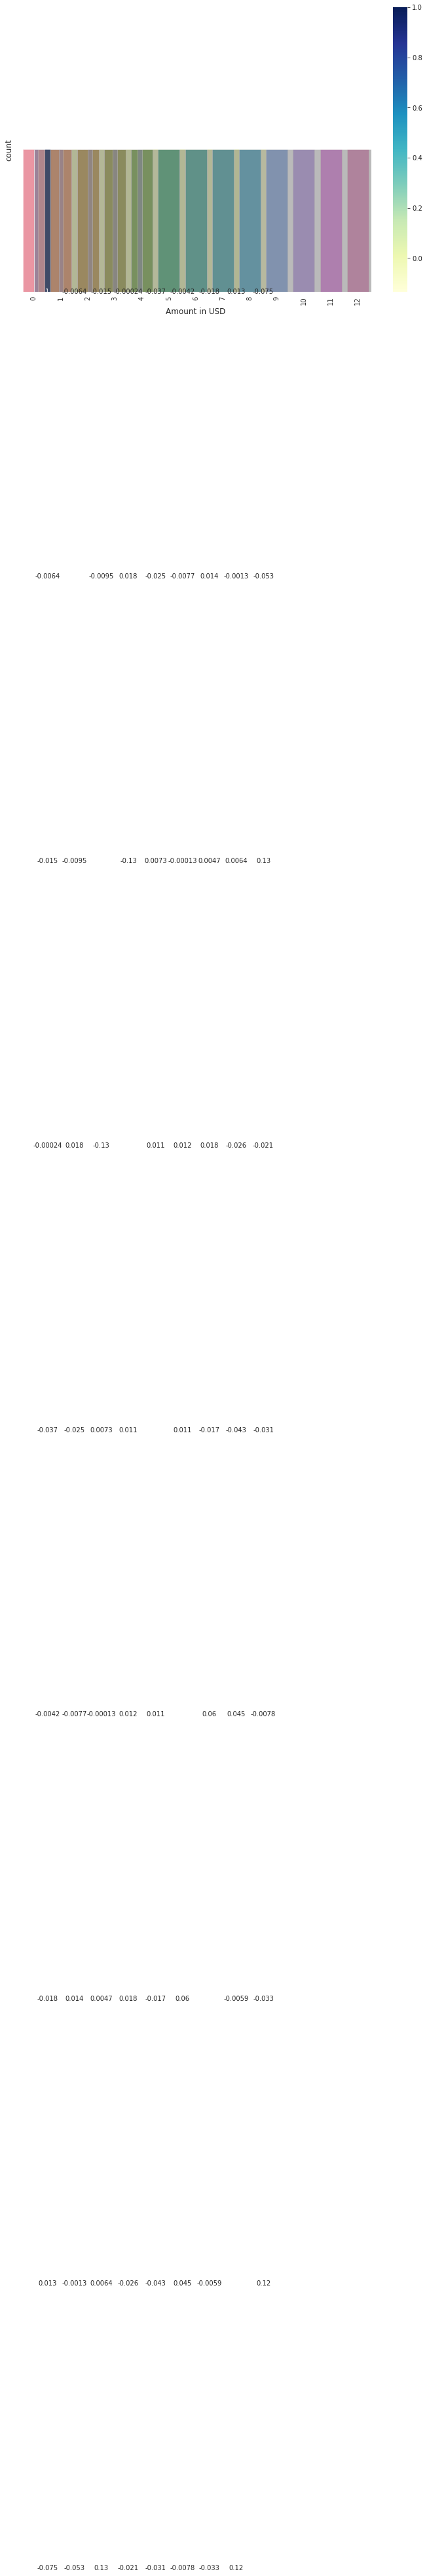

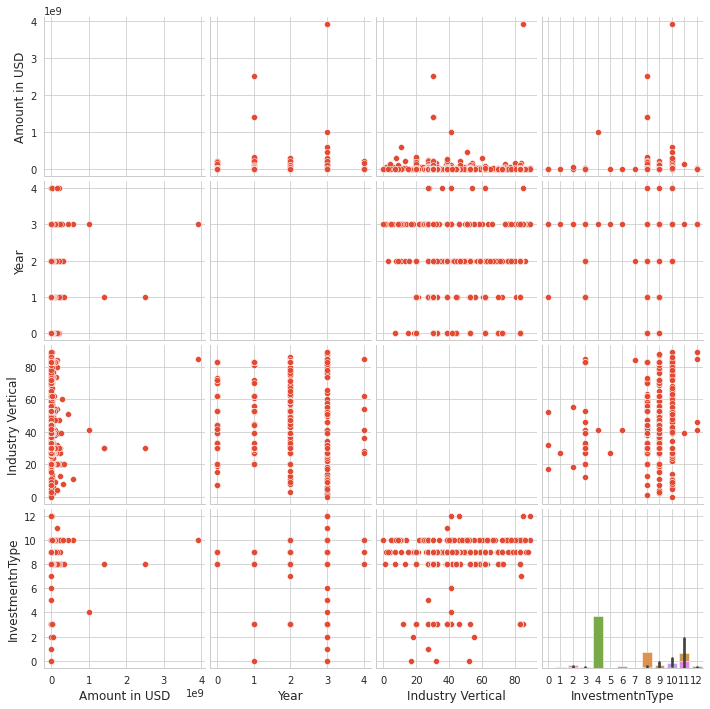

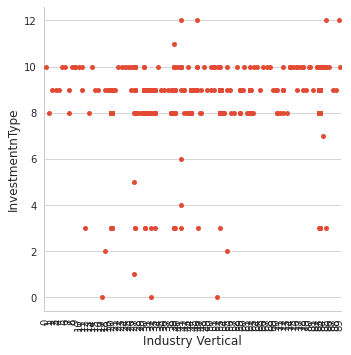

In [40]:
# Check the correlation matrix of the dataframe
corr = df_numerized.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

# Check the distribution of the target variable (if any)
sns.histplot(df_numerized["Amount in USD"], kde=True)

# Check the distribution of categorical variables
sns.countplot(x="Industry Vertical", data=df_numerized)
plt.xticks(rotation=90)

sns.countplot(x="InvestmentnType", data=df_numerized)
plt.xticks(rotation=90)

# Check the distribution of numerical variables
sns.histplot(x="Amount in USD", data=df_numerized, kde=True)

sns.histplot(x="Year", data=df_numerized, kde=True)

sns.histplot(x="Startup Name", data=df_numerized, kde=True)
plt.xticks(rotation=90)

# Check for outliers in numerical variables
sns.boxplot(x="Amount in USD", data=df_numerized)

# Check the relationship between numerical variables
sns.pairplot(df_numerized[["Amount in USD", "Year", "Industry Vertical", "InvestmentnType"]])

# Check the relationship between categorical and numerical variables
sns.barplot(x="Industry Vertical", y="Amount in USD", data=df_numerized)
plt.xticks(rotation=90)

sns.barplot(x="InvestmentnType", y="Amount in USD", data=df_numerized)
plt.xticks(rotation=90)

# Check the relationship between categorical variables
sns.catplot(x="Industry Vertical", y="InvestmentnType", data=df_numerized)
plt.xticks(rotation=90)


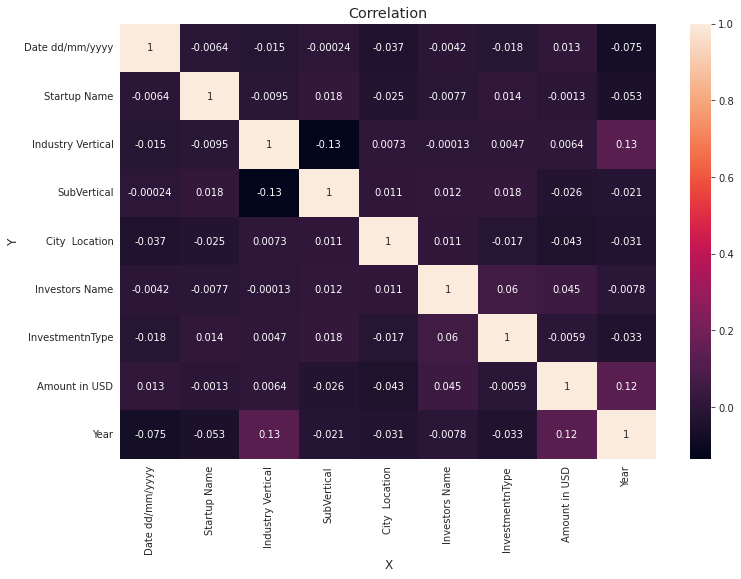

In [41]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [42]:
correlation_mx = df_numerized.corr()
corr_pairs = correlation_mx.unstack
corr_pairs

<bound method DataFrame.unstack of                    Date dd/mm/yyyy  Startup Name  Industry Vertical  \
Date dd/mm/yyyy           1.000000     -0.006351          -0.015044   
Startup Name             -0.006351      1.000000          -0.009503   
Industry Vertical        -0.015044     -0.009503           1.000000   
SubVertical              -0.000235      0.017682          -0.134138   
City  Location           -0.036887     -0.024546           0.007268   
Investors Name           -0.004223     -0.007722          -0.000129   
InvestmentnType          -0.017734      0.014040           0.004658   
Amount in USD             0.012710     -0.001292           0.006412   
Year                     -0.075323     -0.053045           0.130129   

                   SubVertical  City  Location  Investors Name  \
Date dd/mm/yyyy      -0.000235       -0.036887       -0.004223   
Startup Name          0.017682       -0.024546       -0.007722   
Industry Vertical    -0.134138        0.007268       -0.

Text(0, 0.5, 'Investment Amount (USD)')

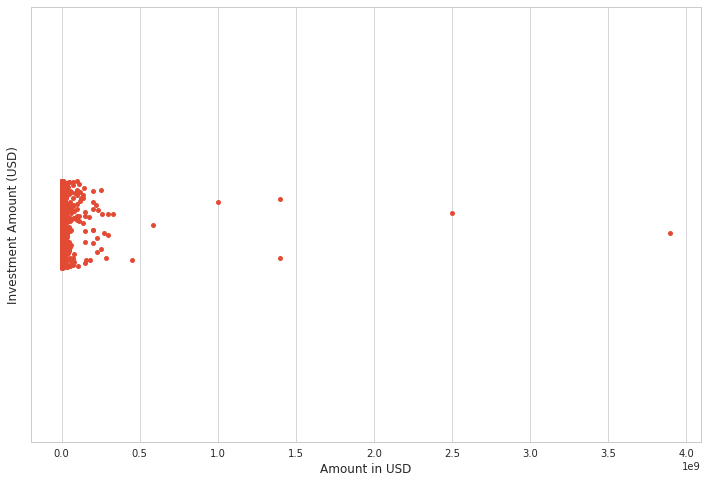

In [43]:
sns.stripplot(x="Amount in USD", data=df_numerized)
plt.ylabel("Investment Amount (USD)")